In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.shape

(195, 24)

In [4]:
data['name'].nunique()

195

Name seems like index so we can drop it

In [5]:
data.drop(['name'],axis = 1, inplace = True)
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Checking correlation between variables

In [6]:
corr = data.corr()

it's hard to check correlation so we creat heatmap

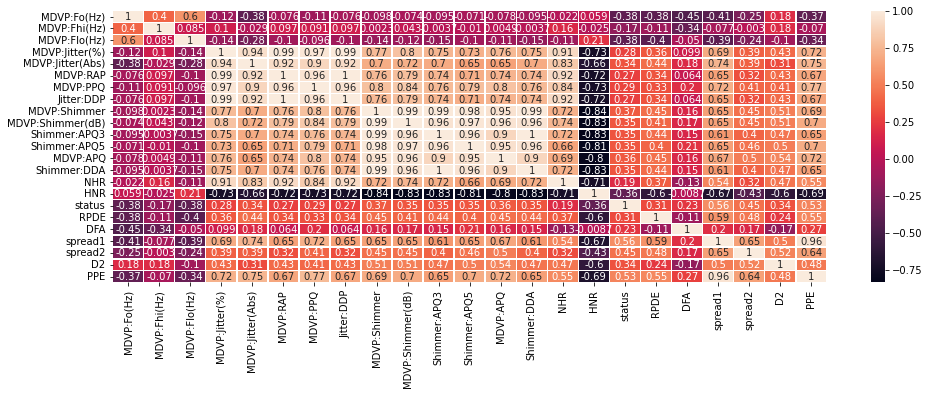

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(corr,annot=True, linewidths=.5)

In [8]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
data.drop(['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','PPE'],axis = 1,inplace = True)

In [10]:
data.shape

(195, 13)

In [11]:
data.isnull().sum()

MDVP:Fo(Hz)     0
MDVP:Fhi(Hz)    0
MDVP:Flo(Hz)    0
MDVP:PPQ        0
MDVP:Shimmer    0
NHR             0
HNR             0
status          0
RPDE            0
DFA             0
spread1         0
spread2         0
D2              0
dtype: int64

In [12]:
corr['status']

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

In [13]:
random_test_samp = np.array(data.drop(['status'],axis = 1).iloc[67])
actul_value = np.array(data['status'].iloc[67])

In [14]:
random_test_samp

array([ 1.369690e+02,  1.666070e+02,  6.600400e+01,  4.630000e-03,
        3.111000e-02,  2.659000e-02,  1.997900e+01,  4.981330e-01,
        7.290670e-01, -5.324574e+00,  2.056600e-01,  2.291558e+00])

Removing Outliers

In [15]:
def outliers(features,df):
  Q1 = df[[features]].quantile(q = 0.25)[0]
  Q3 = df[[features]].quantile(q = 0.75)[0]
  iqr = Q3 - Q1
  min_iqr = Q1 - 1.5*iqr
  max_iqr = Q3 + 1.5*iqr
  return min_iqr,max_iqr,df[[features]].min()[0],df[[features]].max()[0]



for i in data.columns:
  if i == 'status':
    continue
  c=0
  min_iqr,max_iqr,min_value,max_value = outliers(i,data)
  if min_value < min_iqr:
    c+=1
    print('Column ->',i)
    print('--->low bound Outliers at',min_iqr)
  if max_value > max_iqr:
    if c==0:
      print('Column ->',i)
    print('--------->uppar bound Outliers at',max_iqr)
  print()
  print('Conver outliers to nan')
  def convert_nan(x,min_iqr = min_iqr,max_iqr = max_iqr):
    if ((x<min_iqr) or (x>max_iqr)):
      x=np.nan
    else:
      x = x
    return x
  data[i] = data[i].map(convert_nan)
  data[i] = data[i].interpolate(method='linear')



Conver outliers to nan
Column -> MDVP:Fhi(Hz)
--------->uppar bound Outliers at 358.22

Conver outliers to nan
Column -> MDVP:Flo(Hz)
--------->uppar bound Outliers at 223.60975000000005

Conver outliers to nan
Column -> MDVP:PPQ
--------->uppar bound Outliers at 0.0070975000000000005

Conver outliers to nan
Column -> MDVP:Shimmer
--------->uppar bound Outliers at 0.069955

Conver outliers to nan
Column -> NHR
--------->uppar bound Outliers at 0.0552125

Conver outliers to nan
Column -> HNR
--->low bound Outliers at 10.381750000000004

Conver outliers to nan

Conver outliers to nan

Conver outliers to nan
Column -> spread1
--------->uppar bound Outliers at -2.9403359999999985

Conver outliers to nan
Column -> spread2
--->low bound Outliers at 0.017025250000000075
--------->uppar bound Outliers at 0.43655924999999995

Conver outliers to nan
Column -> D2
--------->uppar bound Outliers at 3.44245175

Conver outliers to nan


In [16]:
data['status'].unique()

array([1, 0])

## Training Data Set

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
X = data.drop(['status'],axis = 1)
y= data['status']

In [19]:
min_max = MinMaxScaler((-1,1))
X = min_max.fit_transform(X)

In [20]:
X.shape

(195, 12)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=7)
y_train

27     1
40     1
138    1
31     0
150    1
      ..
103    1
151    1
67     1
25     1
175    0
Name: status, Length: 156, dtype: int64

In [22]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_lr_predict = LR.predict(X_test)
print('LogisticRegression accuracy:',(accuracy_score(y_test,y_lr_predict))*100)

LogisticRegression accuracy: 84.61538461538461


In [23]:
svc = SVC()
svc.fit(X_train,y_train)
y_svc_predict = svc.predict(X_test)
print('SVC accuracy:',(accuracy_score(y_test,y_svc_predict))*100)

SVC accuracy: 92.3076923076923


In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_knn_predict = knn.predict(X_test)

print('knn accuracy:',(accuracy_score(y_test,y_knn_predict))*100)

knn accuracy: 94.87179487179486


In [25]:
y_predict_train = knn.predict(X_train)

print('knn accuracy:',(accuracy_score(y_train,y_predict_train))*100)

knn accuracy: 96.7948717948718


y train predcit is higher than y test predict so we can consider our model is not overfitting.

KNN provides higher accuracy

In [26]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_predict = DT.predict(X_test)

print('Decision Tree accuracy:',(accuracy_score(y_test,y_predict))*100)

Decision Tree accuracy: 94.87179487179486


In [27]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_predict = RF.predict(X_test)

print('Random Forest Tree accuracy:',(accuracy_score(y_test,y_predict))*100)

Random Forest Tree accuracy: 89.74358974358975


In [28]:
#trying random input
n= 40
y_pre = knn.predict([X[n]])
print(y_pre)
print(y[n])

[1]
1


In [29]:
#confuction matrix
temp = pd.DataFrame({'actual': y_train,'predicted':y_predict_train})
pd.crosstab(temp['actual'],temp['predicted'])

predicted,0,1
actual,,
0,40,1
1,4,111


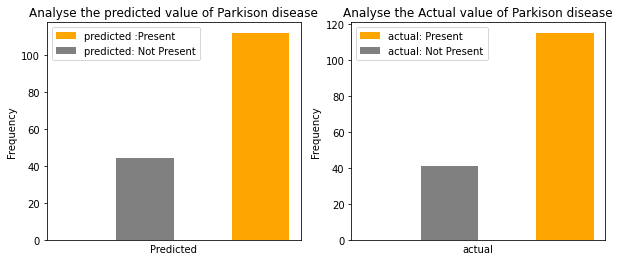

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[1].hist(temp['actual'][temp['actual']==1],2,color='orange' ,label='actual: Present')
ax[1].hist(temp['actual'][temp['actual']==0],2,color='grey',label='actual: Not Present')
ax[0].hist(temp['predicted'][temp['predicted']==1],2,color='orange',label='predicted :Present')
ax[0].hist(temp['predicted'][temp['predicted']==0],2,color='gray',label='predicted: Not Present')

ax[0].set_xticks([])  #hide text from x- axis
ax[1].set_xticks([])  #hide text from x- axis

ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Frequency')

ax[1].set_xlabel('actual')
ax[1].set_ylabel('Frequency')



ax[1].legend()
ax[0].legend()
ax[0].set_title('Analyse the predicted value of Parkison disease')
ax[1].set_title('Analyse the Actual value of Parkison disease')
plt.show()

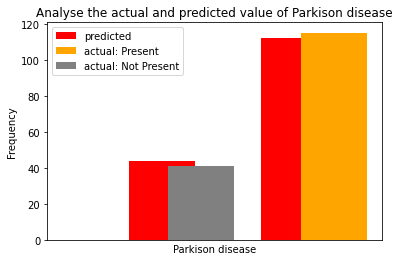

In [44]:
plt.hist(temp['predicted'][temp['predicted']==1]-0.3,2,color='red',label='predicted')
plt.hist(temp['predicted'][temp['predicted']==0]-0.3,2,color='red')
plt.hist(temp['actual'][temp['actual']==1],2,color='orange' ,label='actual: Present')
plt.hist(temp['actual'][temp['actual']==0],2,color='grey',label='actual: Not Present')



plt.xticks([])  #hide text from x- axis
plt.xlabel('Parkison disease')
plt.ylabel('Frequency')
plt.legend()
plt.title('Analyse the actual and predicted value of Parkison disease')
plt.show()

In [84]:
y_svc_train = svc.predict(X_train)
temp_svc = pd.DataFrame({'actual':y_train,'predicted':y_svc_train})

In [85]:
pd.crosstab(temp_svc['actual'],temp_svc['predicted'])

predicted,0,1
actual,,
0,23,18
1,0,115
